In [1]:
import numpy as np
import energyflow as ef
import matplotlib.pyplot as plt

In [2]:
zjets = ef.zjets_delphes.load('Pythia21', num_data=1000000, pad=False, exclude_keys=['particles','gen_particles'])

In [3]:
gen_Zs = []
gen_mults = []
gen_jets = []
gen_widths = []
gen_tau2s = []
gen_zgs = []
gen_sdms = []

sim_mults = []
sim_jets = []
sim_widths = []
sim_tau2s = []
sim_zgs = []
sim_sdms = []
for line in open("test_Omni.txt"):
    if 'truth' in line:
        ZpT = float(line.split()[2])
        if (ZpT > 200):
            gen_Zs+=[[ZpT,0.,0.]]
            gen_mults+=[int(line.split()[14])]
            gen_jets+=[[float(line.split()[3]),float(line.split()[4]),float(line.split()[5]),float(line.split()[6])]]
            gen_widths+=[float(line.split()[7])]
            gen_tau2s+=[float(line.split()[8])]
            zg = float(line.split()[13])
            if np.isnan(zg):
                zg = 0.
                pass
            gen_zgs+=[zg]
            gen_sdms+=[float(line.split()[12])]
            pass
        pass
    if 'reco' in line:
        ZpT = float(line.split()[2])
        if (ZpT > 200):
            sim_mults+=[int(line.split()[14])]
            sim_jets+=[[float(line.split()[3]),float(line.split()[4]),float(line.split()[5]),float(line.split()[6])]]
            sim_widths+=[float(line.split()[7])]
            sim_tau2s+=[float(line.split()[8])]
            zg = float(line.split()[13])
            if np.isnan(zg):
                zg = 0.
                pass
            sim_zgs+=[zg]
            sim_sdms+=[float(line.split()[12])]
            pass
        pass
    pass
zjets_bigger = {}
zjets_bigger['gen_Zs'] = np.array(gen_Zs)
zjets_bigger['gen_mults'] = np.array(gen_mults)
zjets_bigger['gen_jets'] = np.array(gen_jets)
zjets_bigger['gen_widths'] = np.array(gen_widths)
zjets_bigger['gen_tau2s'] = np.array(gen_tau2s)
zjets_bigger['gen_zgs'] = np.array(gen_zgs)
zjets_bigger['gen_sdms'] = np.array(gen_sdms)

zjets_bigger['sim_mults'] = np.array(sim_mults)
zjets_bigger['sim_jets'] = np.array(sim_jets)
zjets_bigger['sim_widths'] = np.array(sim_widths)
zjets_bigger['sim_tau2s'] = np.array(sim_tau2s)
zjets_bigger['sim_zgs'] = np.array(sim_zgs)
zjets_bigger['sim_sdms'] = np.array(sim_sdms)

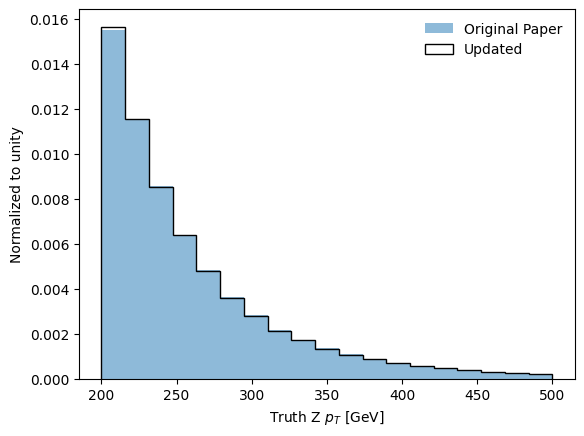

In [4]:
plt.hist(zjets['gen_Zs'][:,0],bins=np.linspace(200,500,20),density=True,label="Original Paper",alpha=0.5)
plt.hist(zjets_bigger['gen_Zs'][:,0],bins=np.linspace(200,500,20),density=True,histtype="step",color="black",label="Updated")
plt.xlabel("Truth Z $p_T$ [GeV]")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

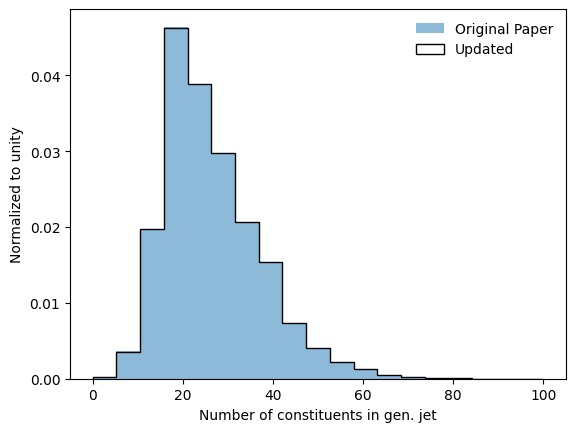

In [5]:
_=plt.hist(zjets['gen_mults'],bins=np.linspace(0,100,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['gen_mults'],bins=np.linspace(0,100,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Number of constituents in gen. jet")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

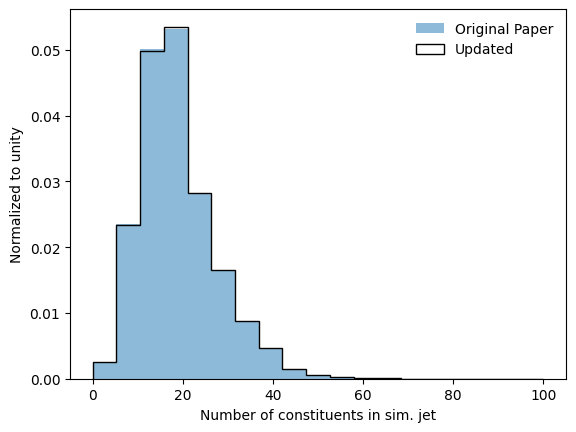

In [6]:
_=plt.hist(zjets['sim_mults'],bins=np.linspace(0,100,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['sim_mults'],bins=np.linspace(0,100,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Number of constituents in sim. jet")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

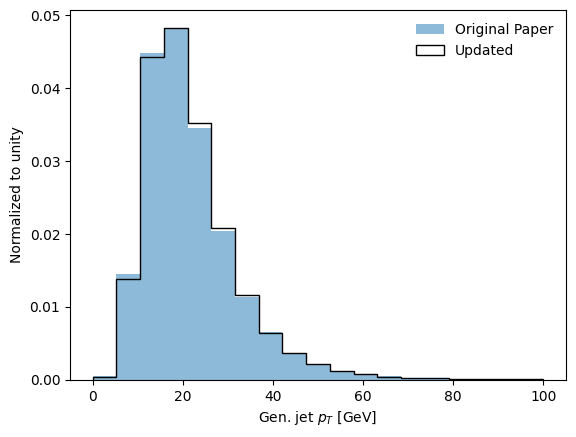

In [7]:
_=plt.hist(zjets['gen_jets'][:,3],bins=np.linspace(0,100,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['gen_jets'][:,3],bins=np.linspace(0,100,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Gen. jet $p_T$ [GeV]")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

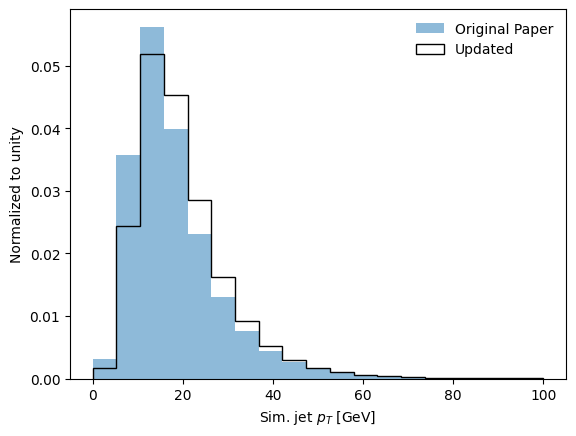

In [8]:
_=plt.hist(zjets['sim_jets'][:,3],bins=np.linspace(0,100,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['sim_jets'][:,3],bins=np.linspace(0,100,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Sim. jet $p_T$ [GeV]")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

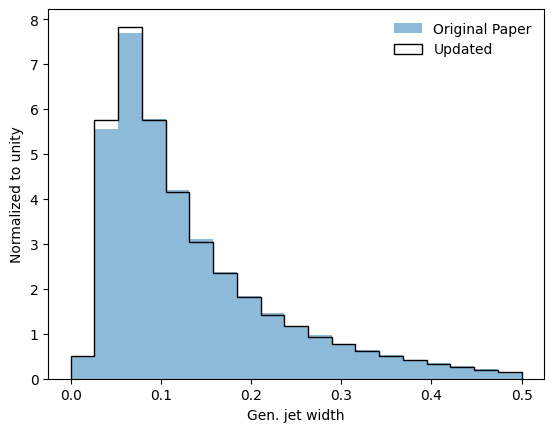

In [9]:
_=plt.hist(zjets['gen_widths'],bins=np.linspace(0,0.5,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['gen_widths'],bins=np.linspace(0,0.5,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Gen. jet width")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

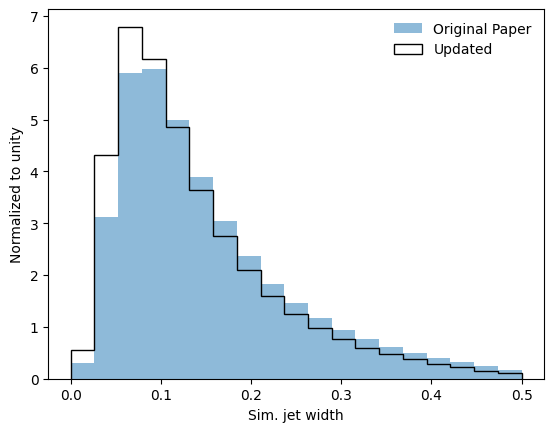

In [10]:
_=plt.hist(zjets['sim_widths'],bins=np.linspace(0,0.5,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['sim_widths'],bins=np.linspace(0,0.5,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Sim. jet width")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

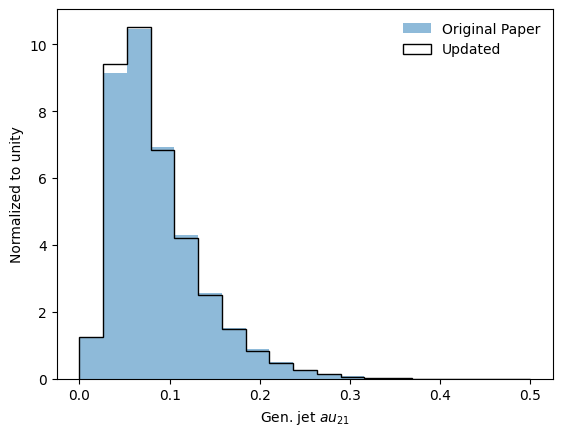

In [11]:
_=plt.hist(zjets['gen_tau2s'],bins=np.linspace(0,0.5,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['gen_tau2s'],bins=np.linspace(0,0.5,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Gen. jet $\tau_{21}$")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

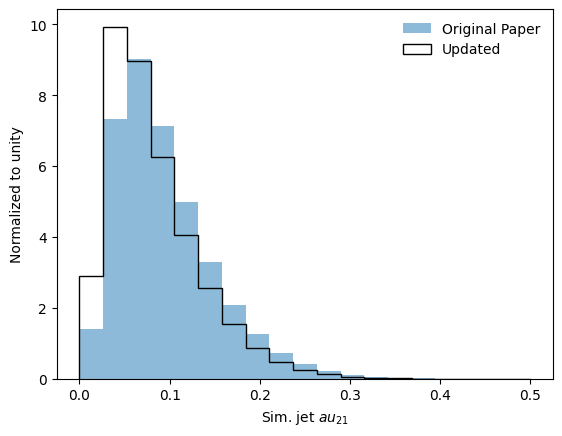

In [12]:
_=plt.hist(zjets['sim_tau2s'],bins=np.linspace(0,0.5,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['sim_tau2s'],bins=np.linspace(0,0.5,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Sim. jet $\tau_{21}$")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

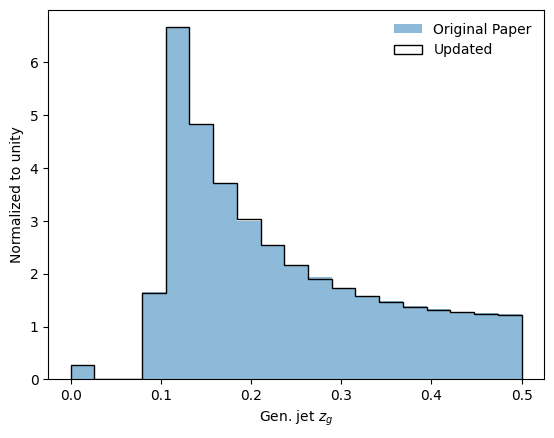

In [13]:
_=plt.hist(zjets['gen_zgs'],bins=np.linspace(0,0.5,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['gen_zgs'],bins=np.linspace(0,0.5,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Gen. jet $z_g$")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

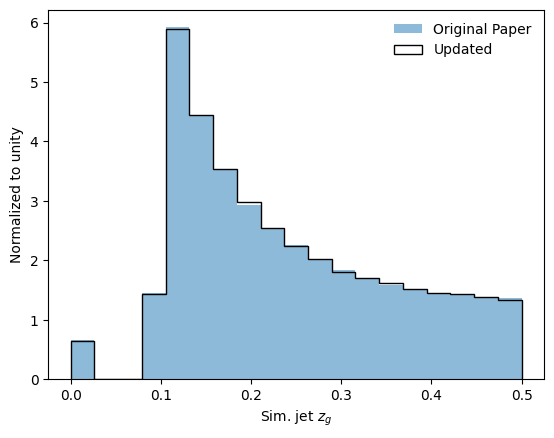

In [14]:
_=plt.hist(zjets['sim_zgs'],bins=np.linspace(0,0.5,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['sim_zgs'],bins=np.linspace(0,0.5,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Sim. jet $z_g$")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

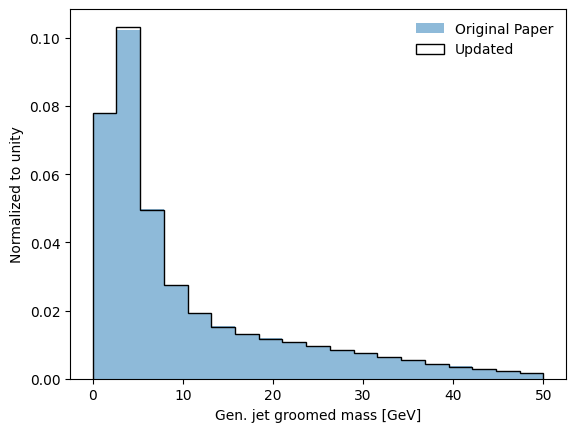

In [15]:
_=plt.hist(zjets['gen_sdms'],bins=np.linspace(0,50,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['gen_sdms'],bins=np.linspace(0,50,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Gen. jet groomed mass [GeV]")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)

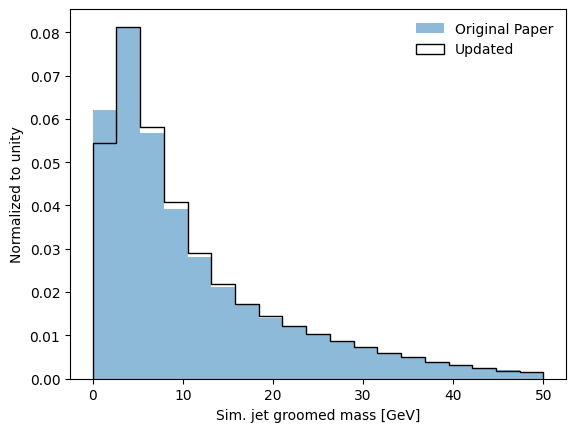

In [16]:
_=plt.hist(zjets['sim_sdms'],bins=np.linspace(0,50,20),density=True,label="Original Paper",alpha=0.5)
_=plt.hist(zjets_bigger['sim_sdms'],bins=np.linspace(0,50,20),histtype="step",color="black",label="Updated",density=True,)
plt.xlabel("Sim. jet groomed mass [GeV]")
plt.ylabel("Normalized to unity")
plt.legend(frameon=False)